In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def icc3PL(a, b, c, theta):
    D = 1.7
    prob = c + (1-c)*(1/(1+np.exp(-D*a*(theta-b))))
    return prob

In [3]:
A = [1.27, 1.34, 1.14, 1.00, 0.67]
B = [1.19, 0.59, 0.15, -0.59, -2.00]
C = [0.10, 0.15, 0.15, 0.20, 0.01]

In [26]:
ir3 = [0,0,0,1,1]

In [27]:
prob = 1
for a,b,c,ir in zip(A,B,C,ir3):
    p = icc3PL(a, b, c, 0)
    if ir==0:
        p = 1-p
    prob *= p
print(prob)

0.19544412904484626


In [28]:
def likelihood(theta):
    like = 1
    for a,b,c,ir in zip(A,B,C,ir3):
        p = icc3PL(a, b, c, theta)
        if ir==0:
            p = 1-p
        like *= p
    return like

In [29]:
x = []
y = []
logy = []
for i in range(-30,30):
    x.append(i/10)
    like = likelihood(i/10)
    y.append(like)
    logy.append(np.log(like))

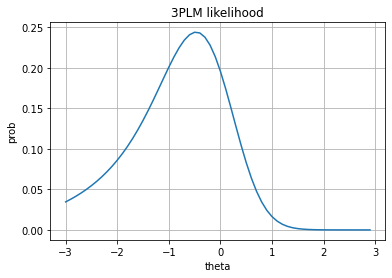

In [30]:
fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='theta', ylabel='prob',
       title='3PLM likelihood')
ax.grid()
plt.show()

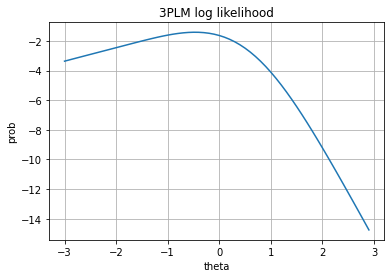

In [31]:
fig, ax = plt.subplots()
ax.plot(x, logy)

ax.set(xlabel='theta', ylabel='prob',
       title='3PLM log likelihood')
ax.grid()
plt.show()

In [32]:
x[np.argmax(y)]

-0.5